In [1]:
import pandas as pd
df=pd.read_csv('c:/data/titanic/data.csv')
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [2]:
cols=['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A',
'deck_B','deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
'embarked_C','embarked_Q', 'embarked_S']
X=df[cols]
y=df['survived']
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2['survived'].value_counts()

0    342
1    342
Name: survived, dtype: int64

In [4]:
X=df2[cols]
y=df2['survived']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
#로지스틱회귀 모델
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0)
logit.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [8]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [9]:
#사례기반추론 모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
#인공신경망 모델
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=0,max_iter=1000)
ann.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [11]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train_scaled, y_train)
print(logit.score(X_test_scaled, y_test))
print(rf.score(X_test_scaled, y_test))
print(knn.score(X_test_scaled, y_test))
print(ann.score(X_test_scaled, y_test))
print(svm.score(X_test_scaled, y_test))

0.8394160583941606
0.8175182481751825
0.8029197080291971
0.7956204379562044
0.8394160583941606


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


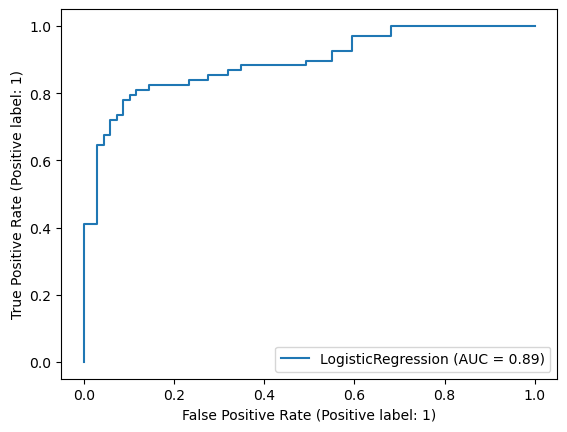

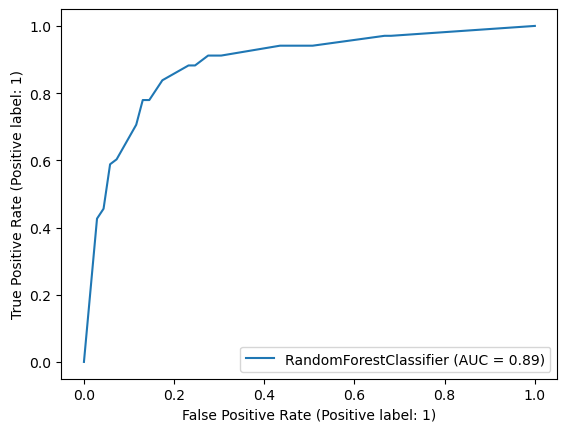

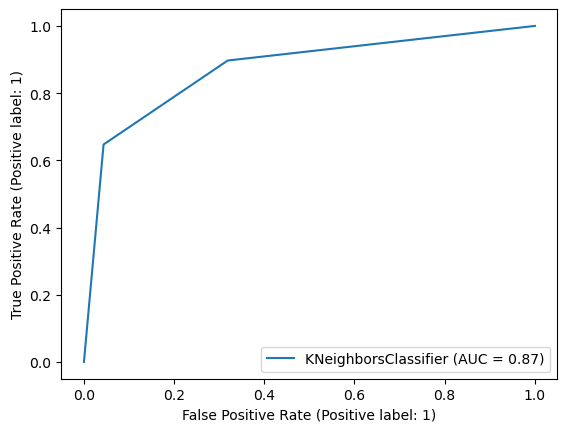

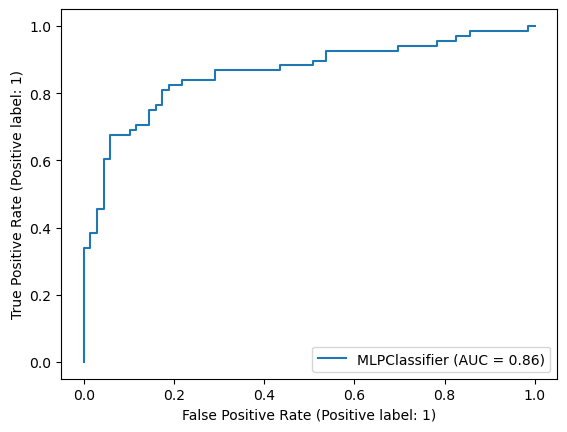

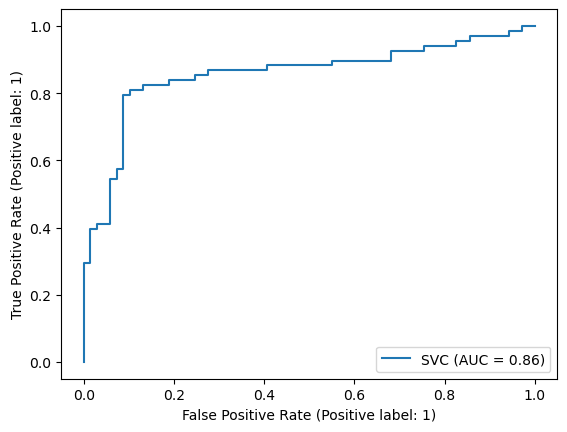

In [12]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logit, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(ann, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)

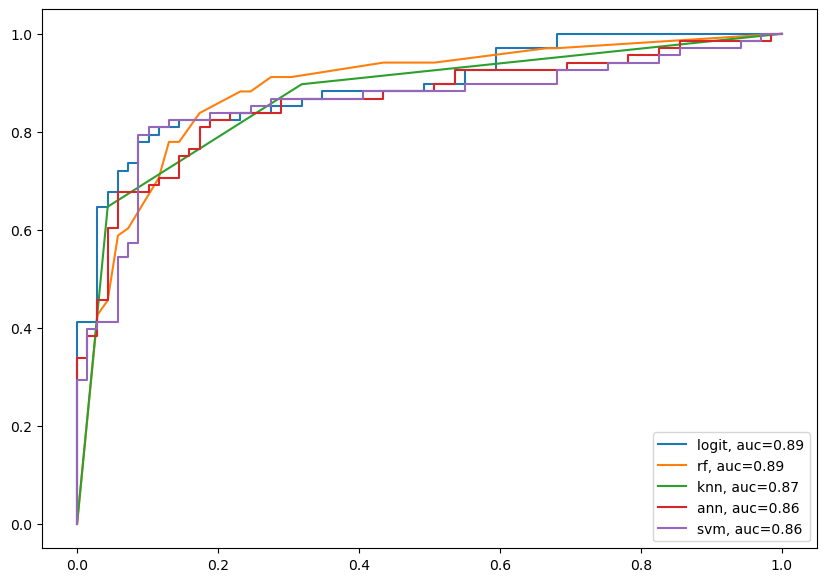

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,7))

pred=logit.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="logit, auc="+str(f'{auc:.2f}'))

pred=rf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="rf, auc="+str(f'{auc:.2f}'))

pred=knn.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="knn, auc="+str(f'{auc:.2f}'))

pred=ann.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="ann, auc="+str(f'{auc:.2f}'))

pred=svm.decision_function(X_test_scaled)
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="svm, auc="+str(f'{auc:.2f}'))

plt.legend()
plt.show()
